# TP  Evolution de la population des communes françaises 

Bernard Uguen 

Février 2023 

Objectifs du TP 
----------------

+ Utiliser le module pandas et les structures de données qu'il introduit (au dessus de numpy)
    + Séries 
    + DataFrame 
+ Pratiquer pandas sur un cas concret (études des communes françaises)
    + Lecture 
    + Mise en forme, gestion des données invalides
    + Association entre différentes sources de données (merge) 
    + Visualisation (scatter plot)
    
    

#  Etude des Communes Françaises

In [27]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Vous disposez sur moodle d'une archive contenant différents fichiers sélectionnés pour les besoins du TP. 
En particulier: 

+  `commune1.csv`est un fichier qui contient l'évolution démographique de toutes les communes française depuis 1975 ainsi que les coordonnées géographiques (longitude,latitude) de la commune. Ce fichier est volumineux et découpés en 2 archives zip.
+ `commune2.csv`est un fichier d'une autre source qui contient entre autres les codes postaux des communes 
+ `maires-25-04-2014.xslx` contient la liste des maires de France. 
+ `insee.csv` 


Sur la figure ci-dessous chaque point correspond à une commune. 

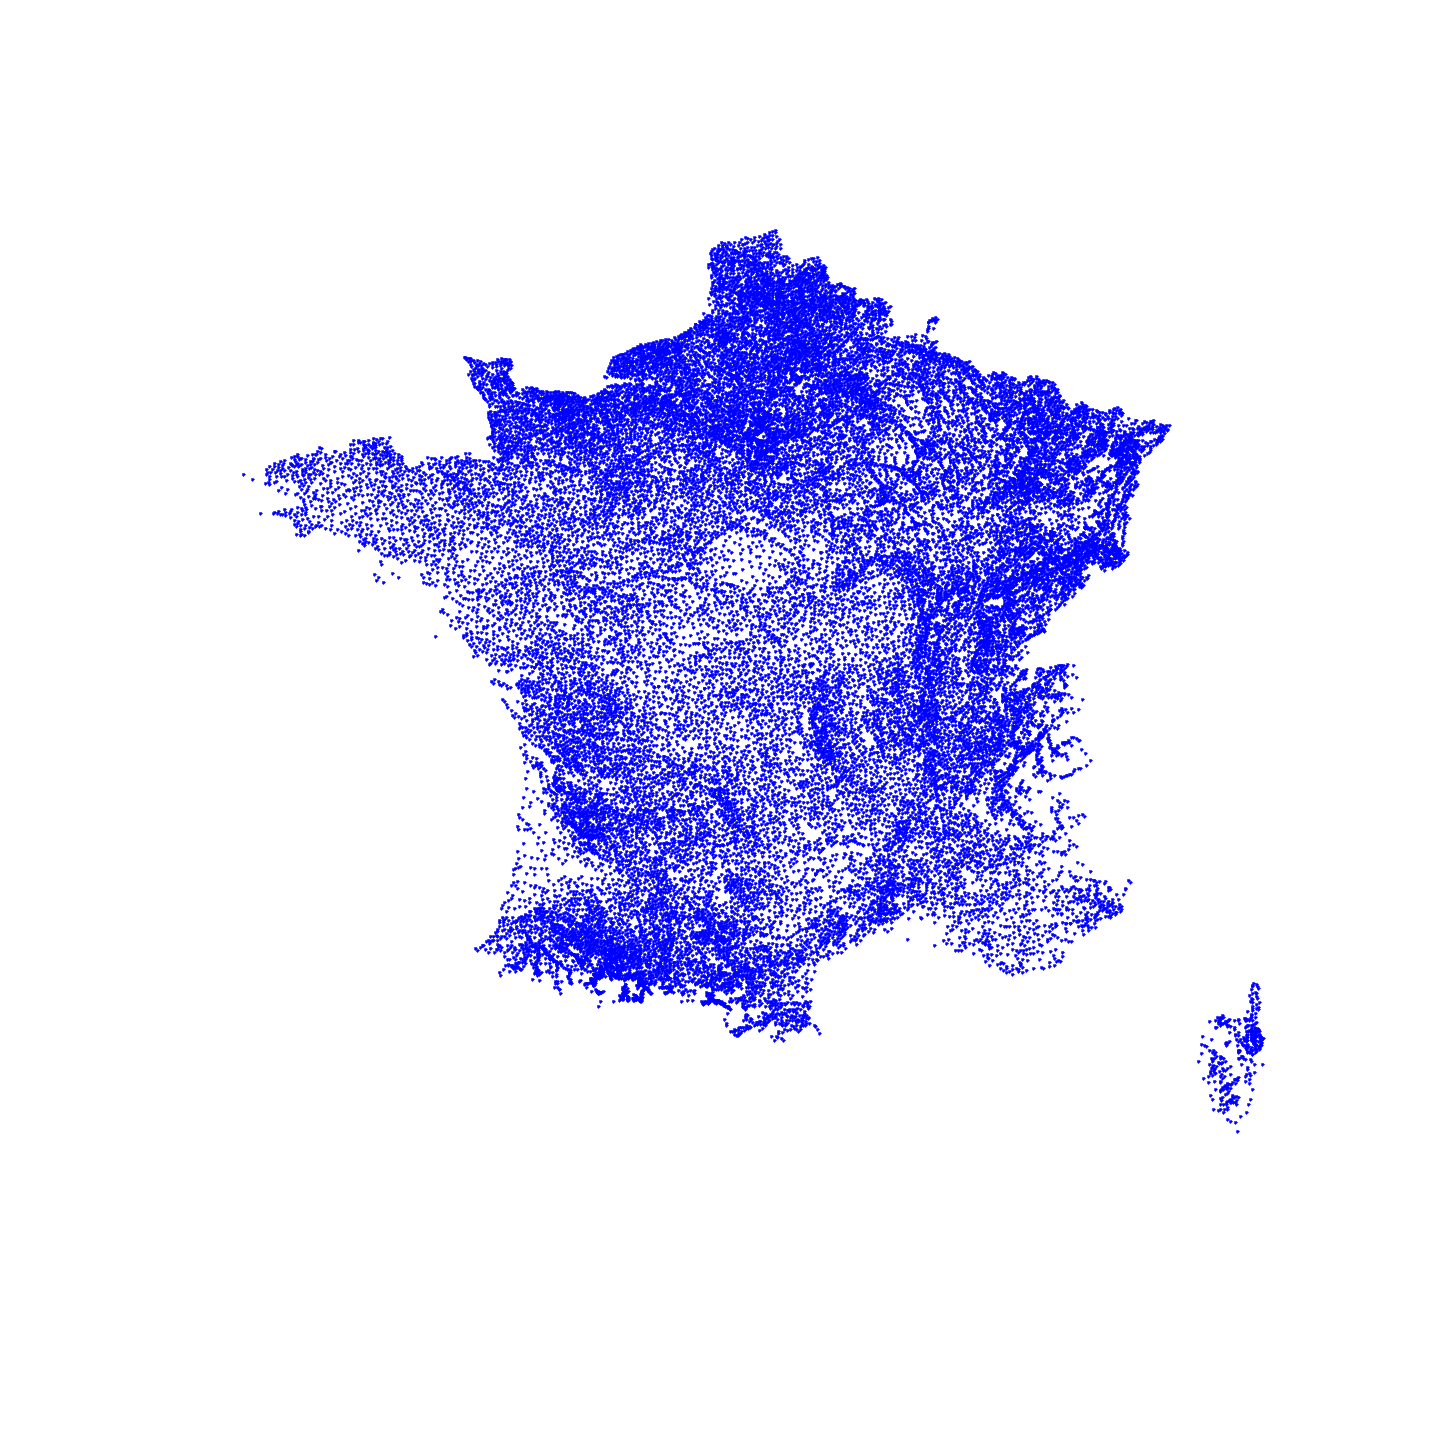

In [45]:
Image('communes.png')

## Lecture de fichiers

+ Utiliser les fonctions de lecture dédiées de pandas pour lire les différents jeux de données fournis

+ `pd.read_csv`
+ `pd.io.excel.read_excel`

In [28]:
# create a dataframe from the csv file
df_communes11 = pd.read_csv('commune1_part1.csv')
df_communes11.columns = ['reg', 'Code du departement', 'com', 'article', 'com_nom', 'long', 'lat', 'pop_1975',
       'pop_1976', 'pop_1977', 'pop_1978', 'pop_1979', 'pop_1980', 'pop_1981',
       'pop_1982', 'pop_1983', 'pop_1984', 'pop_1985', 'pop_1986', 'pop_1987',
       'pop_1988', 'pop_1989', 'pop_1990', 'pop_1991', 'pop_1992', 'pop_1993',
       'pop_1994', 'pop_1995', 'pop_1996', 'pop_1997', 'pop_1998', 'pop_1999',
       'pop_2000', 'pop_2001', 'pop_2002', 'pop_2003', 'pop_2004', 'pop_2005',
       'pop_2006', 'pop_2007', 'pop_2008', 'pop_2009', 'pop_2010']
df_communes11.head()

,reg,Code du departement,com,article,com_nom,long,lat,pop_1975,pop_1976,pop_1977,...,pop_2001,pop_2002,pop_2003,pop_2004,pop_2005,pop_2006,pop_2007,pop_2008,pop_2009,pop_2010
0,11,75,56,NaN,PARIS,2.352222,48.856614,2.294116e+06,2.277408e+06,2.261510e+06,...,2.142425e+06,2.149205e+06,2.156989e+06,2.165785e+06,2.175600e+06,2.186440e+06,2.198315e+06,2.211230e+06,2.225194e+06,2.240213e+06
1,11,77,1,NaN,ACHERES-LA-FORET,2.570289,48.354976,6.482592e+02,6.620875e+02,6.763429e+02,...,1.106389e+03,1.126294e+03,1.146224e+03,1.166163e+03,1.186095e+03,1.206006e+03,1.225880e+03,1.245702e+03,1.265455e+03,1.285127e+03
2,11,77,10,NaN,AUBEPIERRE-OZOUER-LE-REPOS,2.890552,48.632323,5.874394e+02,5.995405e+02,6.118238e+02,...,8.738642e+02,8.797754e+02,8.849946e+02,8.894883e+02,8.932229e+02,8.961646e+02,8.982798e+02,8.995351e+02,8.998966e+02,8.993365e+02
3,11,77,100,LE,CHATELET-EN-BRIE,2.792095,48.504945,2.251402e+03,2.481846e+03,2.695300e+03,...,4.408286e+03,4.407891e+03,4.407379e+03,4.407398e+03,4.408599e+03,4.411630e+03,4.417140e+03,4.425779e+03,4.438194e+03,4.454928e+03
4,11,77,101,NaN,CHATENAY-SUR-SEINE,3.096229,48.418774,5.071603e+02,5.391894e+02,5.699313e+02,...,9.284420e+02,9.278621e+02,9.260636e+02,9.230492e+02,9.188215e+02,9.133832e+02,9.067369e+02,8.988853e+02,8.898310e+02,8.795762e+02


In [29]:
df_communes12 = pd.read_csv('commune1_part2.csv')
# nommer les colonnes
df_communes12.columns = ['reg', 'Code du departement', 'com', 'article', 'com_nom', 'long', 'lat', 'pop_1975',
       'pop_1976', 'pop_1977', 'pop_1978', 'pop_1979', 'pop_1980', 'pop_1981',
       'pop_1982', 'pop_1983', 'pop_1984', 'pop_1985', 'pop_1986', 'pop_1987',
       'pop_1988', 'pop_1989', 'pop_1990', 'pop_1991', 'pop_1992', 'pop_1993',
       'pop_1994', 'pop_1995', 'pop_1996', 'pop_1997', 'pop_1998', 'pop_1999',
       'pop_2000', 'pop_2001', 'pop_2002', 'pop_2003', 'pop_2004', 'pop_2005',
       'pop_2006', 'pop_2007', 'pop_2008', 'pop_2009', 'pop_2010']
df_communes12.head()

,reg,Code du departement,com,article,com_nom,long,lat,pop_1975,pop_1976,pop_1977,...,pop_2001,pop_2002,pop_2003,pop_2004,pop_2005,pop_2006,pop_2007,pop_2008,pop_2009,pop_2010
0,41,55,464,NaN,SAINT-PIERREVILLERS,5.683704,49.377203,162.509134,159.198180,156.015640,...,133.906559,135.902831,138.184995,140.759107,143.631223,146.807401,150.293698,154.096170,158.220874,162.672857
1,41,55,465,NaN,SAINT-REMY-LA-CALONNE,5.601770,49.046117,43.531399,42.753629,42.190322,...,64.106827,65.292227,66.403061,67.428214,68.356567,69.177006,69.878414,70.449673,70.879669,71.159136
2,41,55,466,NaN,SALMAGNE,5.324271,48.750992,213.527607,225.074464,235.858471,...,319.581267,318.014220,316.221938,314.225099,312.044381,309.700459,307.214013,304.605720,301.896256,299.102854
3,41,55,467,NaN,SAMPIGNY,5.511814,48.825108,679.506845,671.393758,665.775219,...,807.722401,805.521020,801.098462,794.273355,784.864323,772.689993,757.568992,739.319944,717.761476,692.742443
4,41,55,468,NaN,SAMOGNEUX,5.337692,49.254560,40.098169,40.405017,40.614989,...,51.772342,53.958021,56.398634,59.107710,62.098782,65.385380,68.981036,72.899280,77.153644,81.755404


In [30]:
import dask.dataframe as dd

In [31]:
df_communes2 = dd.read_csv('commune2.csv', encoding = "ISO-8859-1", sep = ';', header = 0, dtype = {'Commune': 'str', 'Codepos': 'str', 'Depard': 'str', 'Departement': 'str', 'INSEE': 'str'})
df_communes2 = df_communes2.compute()
# modifier les noms des colonnes
df_communes2.columns = ['com_nom', 'Codepos', 'dep', 'INSEE']
df_communes2.head()

,com_nom,Codepos,dep,INSEE
0,L ABERGEMENT CLEMENCIAT,01400,AIN,1001
1,L ABERGEMENT DE VAREY,01640,AIN,1002
2,AMAREINS,01090,AIN,1003
3,AMBERIEU EN BUGEY,01500,AIN,1004
4,AMBERIEUX EN DOMBES,01330,AIN,1005


In [32]:
import openpyxl

In [72]:
# create a dataframe from the xlsx file
df_mairies = pd.io.excel.read_excel('maires.xlsx', header = 3)
# modifier le nom de la colonne spécifique 'Libellé de la commune' par 'com_nom'
df_mairies.rename(columns = {'Libellé de la commune': 'com_nom'}, inplace = True)
df_mairies.head()

,Code du département (Maire),Libellé de département (Maires),Code Insee de la commune,com_nom,Population de la commune,Nom de l'élu,Prénom de l'élu,Civilité,Date de naissance,Code profession,Libellé de la profession
0,1,AIN,1,L'Abergement-Clémenciat,780.0,BOULON,Daniel,M,1951-03-04,61.0,Retraités salariés privés
1,1,AIN,2,L'Abergement-de-Varey,234.0,ORSET,Max,M,1947-11-02,65.0,Autres retraités
2,1,AIN,4,Ambérieu-en-Bugey,13839.0,FABRE,Daniel,M,1961-09-07,51.0,Cadres (entreprises publiques)
3,1,AIN,5,Ambérieux-en-Dombes,1600.0,PERNET,Pierre,M,1961-07-29,42.0,Professeurs du secondaire et techn.
4,1,AIN,6,Ambléon,112.0,BIONDA,Annie,Mme,1951-11-28,63.0,Retraités fonct.publique (sf enseig.)


In [34]:
df_legislatives = pd.read_csv('legislatives2012.csv', low_memory=False)
# mettre la colonne libelle du canton en majuscule
df_legislatives['Libelle du Cantons'] = df_legislatives['Libelle du Cantons'].str.upper()
df_legislatives.head()

,Code du departement,Libelle du departement,Code du Canton,Libelle du Cantons,Code de la circonscription,Libelle de la circonscription,Numero du tour,Inscrits,Abstentions,% Abs/Ins,...,% Voix/Ins.21,% Voix/Exp.21,N Panneau.22,Sexe.22,Nom.22,Prenom.22,Nuance.22,Voix.22,% Voix/Ins.22,% Voix/Exp.22
0,1,AIN,1,AMBERIEU-EN-BUGEY,5,5eme circonscription,1,14829,6412,43.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,AIN,1,AMBERIEU-EN-BUGEY,5,5eme circonscription,2,14829,6609,44.57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,AIN,2,BÂGE-LE-CHÂTEL,4,4eme circonscription,1,11233,4474,39.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,AIN,2,BÂGE-LE-CHÂTEL,4,4eme circonscription,2,11233,4736,42.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,AIN,3,BELLEGARDE-SUR-VALSERINE,3,3eme circonscription,1,10985,5242,47.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df_location = pd.read_csv('locations.csv')
df_location.head()

,ref,Chargescomprises:,Classeénergie:,Codepostal:,GES:,Loyermensuel:,Meublé/Nonmeublé:,Pièces:,Référence:,Surface:,Typedebien:,Ville:,ref.1
0,710178415,NaN,C (de 91 &agrave; 150),35000,C (de 11 &agrave; 20),300.0,Meublé,2.0,NaN,20 m,Appartement,Rennes,710178415
1,710173363,NaN,NaN,35000,NaN,315.0,Non meublé,1.0,NaN,22 m,Appartement,Rennes,710173363
2,710154903,NaN,Vierge,35000,Vierge,579.0,Non meublé,2.0,NaN,38 m,Appartement,Rennes,710154903
3,710154314,NaN,C (de 91 &agrave; 150),35000,D (de 21 &agrave; 35),490.0,Non meublé,NaN,NaN,40 m,Appartement,Rennes,710154314
4,683818358,NaN,C (de 91 &agrave; 150),35000,C (de 11 &agrave; 20),690.0,Non meublé,4.0,NaN,76 m,Appartement,Rennes,683818358


## Nettoyage et fusion (Merge) de tous les `DataFrame`

In [73]:
# fusionner les deux dataframes a partier de la derniere ligne
df_communes1 = pd.concat([df_communes11, df_communes12], axis=0)
df_communes1.head()

,reg,Code du departement,com,article,com_nom,long,lat,pop_1975,pop_1976,pop_1977,...,pop_2001,pop_2002,pop_2003,pop_2004,pop_2005,pop_2006,pop_2007,pop_2008,pop_2009,pop_2010
0,11,75,56,NaN,PARIS,2.352222,48.856614,2.294116e+06,2.277408e+06,2.261510e+06,...,2.142425e+06,2.149205e+06,2.156989e+06,2.165785e+06,2.175600e+06,2.186440e+06,2.198315e+06,2.211230e+06,2.225194e+06,2.240213e+06
1,11,77,1,NaN,ACHERES-LA-FORET,2.570289,48.354976,6.482592e+02,6.620875e+02,6.763429e+02,...,1.106389e+03,1.126294e+03,1.146224e+03,1.166163e+03,1.186095e+03,1.206006e+03,1.225880e+03,1.245702e+03,1.265455e+03,1.285127e+03
2,11,77,10,NaN,AUBEPIERRE-OZOUER-LE-REPOS,2.890552,48.632323,5.874394e+02,5.995405e+02,6.118238e+02,...,8.738642e+02,8.797754e+02,8.849946e+02,8.894883e+02,8.932229e+02,8.961646e+02,8.982798e+02,8.995351e+02,8.998966e+02,8.993365e+02
3,11,77,100,LE,CHATELET-EN-BRIE,2.792095,48.504945,2.251402e+03,2.481846e+03,2.695300e+03,...,4.408286e+03,4.407891e+03,4.407379e+03,4.407398e+03,4.408599e+03,4.411630e+03,4.417140e+03,4.425779e+03,4.438194e+03,4.454928e+03
4,11,77,101,NaN,CHATENAY-SUR-SEINE,3.096229,48.418774,5.071603e+02,5.391894e+02,5.699313e+02,...,9.284420e+02,9.278621e+02,9.260636e+02,9.230492e+02,9.188215e+02,9.133832e+02,9.067369e+02,8.988853e+02,8.898310e+02,8.795762e+02


In [38]:
from datetime import datetime

In [74]:
# modifier l'encodage des noms de communes
df_communes1['com_nom'] = df_communes1['com_nom'].str.encode('latin-1').str.decode('utf-8')
df_communes2['com_nom'] = df_communes2['com_nom'].str.encode('latin-1').str.decode('utf-8')
#df_mairies['com_nom'] = df_mairies['com_nom'].str.encode('latin-1').str.decode('utf-8')

# supprimer les accents des noms de communes
df_mairies['com_nom'] = df_mairies['com_nom'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

# supprimer les espaces en début et fin de chaîne
df_communes1['com_nom'] = df_communes1['com_nom'].str.strip()
df_communes2['com_nom'] = df_communes2['com_nom'].str.strip()
df_mairies['com_nom'] = df_mairies['com_nom'].str.strip()

# mettre en majuscules la colonnes com_nom
df_communes1['com_nom'] = df_communes1['com_nom'].str.upper()
df_communes2['com_nom'] = df_communes2['com_nom'].str.upper()
df_mairies['com_nom'] = df_mairies['com_nom'].str.upper()

# supprimer les chaines de caractères 'LE' et 'LA' en début de chaîne
df_communes2['com_nom'] = df_communes2['com_nom'].str.replace('^LE ', '', regex=True)
df_communes2['com_nom'] = df_communes2['com_nom'].str.replace('^LA ', '', regex=True)
df_communes2['com_nom'] = df_communes2['com_nom'].str.replace('^LES ', '', regex=True)
df_communes2['com_nom'] = df_communes2['com_nom'].str.replace('^L ', '', regex=True)
df_communes2['com_nom'] = df_communes2['com_nom'].str.replace("^L'", '', regex=True)

df_mairies['com_nom'] = df_mairies['com_nom'].str.replace('^LE ', '', regex=True)
df_mairies['com_nom'] = df_mairies['com_nom'].str.replace('^LA ', '', regex=True)
df_mairies['com_nom'] = df_mairies['com_nom'].str.replace('^LES ', '', regex=True)
df_mairies['com_nom'] = df_mairies['com_nom'].str.replace("^L'", '', regex=True)
df_mairies['com_nom'] = df_mairies['com_nom'].str.replace('^L ', '', regex=True)

# remplacer les espaces par des tirets
df_communes1['com_nom'] = df_communes1['com_nom'].str.replace(' ', '-')
df_communes2['com_nom'] = df_communes2['com_nom'].str.replace(' ', '-')
df_mairies['com_nom'] = df_mairies['com_nom'].str.replace(' ', '-')

# 
df_mairies['Date de naissance'] = pd.to_datetime(df_mairies['Date de naissance'], format='%d/%m/%Y')
df_mairies['Date de naissance'] = (datetime.now() - df_mairies['Date de naissance']).astype('<m8[Y]')

# convertir la colonne 'Date de naissance' en entier
#df_mairies['Date de naissance'] = df_mairies['Date de naissance'].astype(int)

# changer le nom de la colonne 'Date de naissance' par 'age'
df_mairies.rename(columns = {'Date de naissance': 'age'}, inplace = True)

# supprimer la dernière ligne du dataframe df_mairies
df_mairies = df_mairies[:-1]

# convertir la colonne 'age' en entier
df_mairies['age'] = df_mairies['age'].astype(int)

# nettoyer la colonnes com_nom des deux dataframes pour qu'elle soit identique



In [75]:
# faire un merge des deux dataframes df_communes1 et df_communes2 en utilisant la colonne com_nom et en groupant les valeurs de la colonne code du departement
df_communes = pd.merge(df_communes1, df_communes2, on = 'com_nom', how = 'left')
df_communes.head()

,reg,Code du departement,com,article,com_nom,long,lat,pop_1975,pop_1976,pop_1977,...,pop_2004,pop_2005,pop_2006,pop_2007,pop_2008,pop_2009,pop_2010,Codepos,dep,INSEE
0,11,75,56,NaN,PARIS,2.352222,48.856614,2.294116e+06,2.277408e+06,2.261510e+06,...,2.165785e+06,2.175600e+06,2.186440e+06,2.198315e+06,2.211230e+06,2.225194e+06,2.240213e+06,75000,PARIS,75100
1,11,77,1,NaN,ACHERES-LA-FORET,2.570289,48.354976,6.482592e+02,6.620875e+02,6.763429e+02,...,1.166163e+03,1.186095e+03,1.206006e+03,1.225880e+03,1.245702e+03,1.265455e+03,1.285127e+03,77760,SEINE ET MARNE,77001
2,11,77,10,NaN,AUBEPIERRE-OZOUER-LE-REPOS,2.890552,48.632323,5.874394e+02,5.995405e+02,6.118238e+02,...,8.894883e+02,8.932229e+02,8.961646e+02,8.982798e+02,8.995351e+02,8.998966e+02,8.993365e+02,NaN,NaN,NaN
3,11,77,100,LE,CHATELET-EN-BRIE,2.792095,48.504945,2.251402e+03,2.481846e+03,2.695300e+03,...,4.407398e+03,4.408599e+03,4.411630e+03,4.417140e+03,4.425779e+03,4.438194e+03,4.454928e+03,77820,SEINE ET MARNE,77100
4,11,77,101,NaN,CHATENAY-SUR-SEINE,3.096229,48.418774,5.071603e+02,5.391894e+02,5.699313e+02,...,9.230492e+02,9.188215e+02,9.133832e+02,9.067369e+02,8.988853e+02,8.898310e+02,8.795762e+02,77126,SEINE ET MARNE,77101


In [77]:
# Faire merge de df_communes et df_mairies en utilisant la colonne com_nom, en supprimant les colonnes doublons et les lignes qui n'ont pas de 'code Insee de la commune'
df_communes = pd.merge(df_communes, df_mairies, on = 'com_nom', how = 'left')
df_communes2 = pd.merge(df_mairies, df_communes, on = 'com_nom', how = 'left')

df_communes.head()

KeyError: 'code Insee de la commune'

In [66]:
# Faire un groupby sur la colonne Code du departement
df_communes_group = df_communes.groupby('Code du departement')
df_communes_group.head()
#afficher la ligne 74178
#df_communes.iloc[74178]

,reg,Code du departement,com,article,com_nom,long,lat,pop_1975,pop_1976,pop_1977,...,Code du département (Maire),Libellé de département (Maires),Code Insee de la commune,Population de la commune,Nom de l'élu,Prénom de l'élu,Civilité,age,Code profession,Libellé de la profession
0,11,75,56,NaN,PARIS,2.352222,48.856614,2.294116e+06,2.277408e+06,2.261510e+06,...,75,PARIS,56,2249975.0,HIDALGO,Anne,Mme,63.0,56.0,Autres professions
1,11,77,1,NaN,ACHERES-LA-FORET,2.570289,48.354976,6.482592e+02,6.620875e+02,6.763429e+02,...,77,SEINE ET MARNE,1,1232.0,MALCHERE,Patrice,M,69.0,1.0,Agriculteurs propriétaires exploit.
2,11,77,10,NaN,AUBEPIERRE-OZOUER-LE-REPOS,2.890552,48.632323,5.874394e+02,5.995405e+02,6.118238e+02,...,77,SEINE ET MARNE,10,895.0,CUYPERS,Pierre,M,78.0,1.0,Agriculteurs propriétaires exploit.
3,11,77,100,LE,CHATELET-EN-BRIE,2.792095,48.504945,2.251402e+03,2.481846e+03,2.695300e+03,...,77,SEINE ET MARNE,100,4413.0,MAZARD,Alain,M,79.0,61.0,Retraités salariés privés
4,11,77,101,NaN,CHATENAY-SUR-SEINE,3.096229,48.418774,5.071603e+02,5.391894e+02,5.699313e+02,...,77,SEINE ET MARNE,101,955.0,BIGOT,Jean Yves,M,75.0,65.0,Autres retraités
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74175,94,202,10,NaN,ALGAJOLA,8.862287,42.608528,1.807435e+02,1.902050e+02,1.982112e+02,...,2B,HAUTE CORSE,10,292.0,PARIGGI,Maurice,M,81.0,63.0,Retraités fonct.publique (sf enseig.)
74176,94,202,101,NaN,CROCE,9.363865,42.413730,9.896693e+01,9.833313e+01,9.763712e+01,...,2B,HAUTE CORSE,101,81.0,MATTEI,Jean-François,M,69.0,20.0,Employés (secteur privé)
74177,94,202,102,NaN,CROCICCHIA,9.352701,42.468638,5.563357e+01,5.556766e+01,5.551384e+01,...,2B,HAUTE CORSE,102,46.0,PIACENTINI,Pierre-Pascal,M,45.0,11.0,Entrepreneurs en batiments
74178,94,202,105,NaN,ERBAJOLO,9.283020,42.264580,1.368330e+02,1.302090e+02,1.241597e+02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Affichage de la densité de population en France en 1975

In [19]:
import geoviews as gv
import cartopy.crs as ccrs



# Créer une palette de 16 couleurs pour les populations
palette = ['#feebe2', '#fcc5c0', '#fa9fb5', '#f768a1', '#dd3497', '#ae017e', '#7a0177', '#49006a', '#c2e699', '#78c679', '#31a354', '#006837', '#fdcc8a', '#fc8d59', '#e34a33', '#b30000']

# Définir les seuils de population pour chaque couleur
seuils = np.linspace(0, 2500000, num=16)

# Définir les noms des couleurs pour la légende
noms_couleurs = [f"< {int(seuils[i+1])}" for i in range(len(seuils)-1)]

# Ajouter une colonne "couleur" au dataframe, en fonction de la population de chaque commune
df_communes['couleur'] = pd.cut(df_communes['pop_1975'], bins=seuils, labels=palette[1:], include_lowest=True)

# Créer la carte avec geoviews et cartopy
communes = gv.Points(df_communes, ['long', 'lat'], ['com_nom', 'pop_1975', 'couleur'])
tiles = gv.tile_sources.CartoDark()

'''options = dict(width=600,
            height=600,
            colorbar=True, 
            cmap=palette, 
            clim=(seuils[0], 
                  seuils[-1]), 
                  color_levels=16, 
                  legend_position='bottom', 
                  legend_position_v= 'center', 
                  tools=['hover'], 
                  show_grid=True, 
                  show_coastline=True, 
                  show_land=True, 
                  show_frame=True, 
                  global_extent=True, 
                  projection=ccrs.PlateCarree())'''
# Options pour les polygones
poly_opts = {
    'color': 'couleur','size': 8, 'marker': 'square', 'colorbar': True,'clim': (seuils[0], seuils[-1]),'cmap': palette,'color_levels': len(palette),'legend_position': 'bottom','legend_position_v': 'center','tools': ['hover'],'tools': ['hover']
}


    

if isinstance(poly_opts, dict):
    # Afficher la carte avec les options spécifiées
    carte = tiles * communes.opts(poly_opts)
else:
    print("options doit être un dictionnaire")

# Afficher la carte
carte


AttributeError: 'str' object has no attribute 'keys'

In [21]:
import folium
import branca.colormap as cm

In [61]:
min_population = df_communes["pop_1975"].min()
max_population = df_communes["pop_1975"].max()

colormap = cm.LinearColormap(
    [ 'green','yellow', 'orange', 'red'],
    vmin=min_population,
    vmax=max_population
)

In [62]:
m = folium.Map(location=[46.2276, 2.2137], zoom_start=6)

for index, row in df_communes.iterrows():
    pop = row["pop_1975"]
    com_nom = row["com_nom"]
    folium.CircleMarker(
        [row["lat"], row["long"]],
        color=colormap(row["pop_1975"]),
        fill=True,
        fill_color=colormap(row["pop_1975"]),
        radius=row["pop_1975"] / 100000,
        popup=f"Commune: {com_nom}<br>Population: {pop}",
        fill_opacity=0.7
    ).add_to(m)

m.save('population.html')


### Affichage des communes selon l'âge de leur maire

In [22]:
color_scale = cm.LinearColormap(
    [ 'green','yellow', 'orange', 'red'],
    vmin=df_communes["age"].min(),
    vmax=df_communes["age"].max()
)

In [24]:
m2 = folium.Map(location=[46.2276, 2.2137], zoom_start=6)
sorted_df = df_communes.sort_values("age")
colors = [color_scale(age) for age in sorted_df["age"]]


for index, row in sorted_df.iterrows():
    color = colors[index]
    nom = row["Nom de l'élu"]
    prenom = row["Prénom de l'élu"]
    com_nom = row["com_nom"]
    folium.CircleMarker(
        [row["lat"], row["long"]],
        color=color,
        fill=True,
        fill_color=color_scale(row["age"]),
        radius=row["age"] / 10,
        popup=f"Commune: {com_nom}<br>Nom: {nom}<br>Prenom: {prenom}",
        fill_opacity=0.7
    ).add_to(m2)

    m2.save('age.html')

ValueError: Thresholds are not sorted.

Utiliser la fonction merge pour fusionner les différents DataFrame fournis en un seul DataFrame contenant toutes l'information. 


Cette étape nécessite au préalable d'identifier les colonnes permettant de merger et nécessite une harmonisation des colonnes pivots. 


Différentes difficultés vont apparaître liés à des hétérogénéité dans les différentes sources de données. 


Problèmes à attendre : 

Plusieurs communes françaises portent le même nom, mais elles sont rarement dans le même département. Utiliser  la commande **`group_by`** pour enchaîner des traitement par départements. 
La syntaxe des noms de communes diffère entre les différentes sources de données, il faudra donc veiller à harmoniser le nom de la commune dans les différents `DataFrame`. 


In [ ]:
!pwd

/home/guypi/Documents


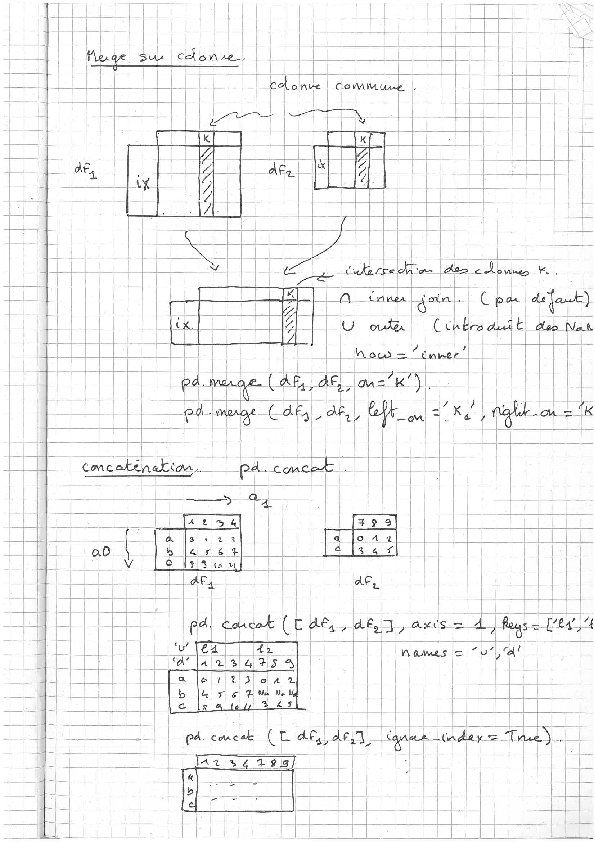

In [ ]:
Image('merge.png')

## Analyse demandées

+ Construire une fonction qui évalue le taux de croissance de la population entre deux années consécutives. 

+ Visualiser avec la fonction `plt.scatter` la croissance ou la décroissance de la population
+ Proposer des visualisations de la répartition des communes en fonction de différents critères (superficie, prénom du maire, ...)

Ressources
----------

Dans la suite pour rechercher la documentation qui vous sera nécessaire pour réaliser le TP, utiliser les ressources suivantes : 

[Basiques de Pandas](http://nbviewer.ipython.org/github/twiecki/financial-analysis-python-tutorial/blob/master/1.%20Pandas%20Basics.ipynb)

[Tutoriel pandas](http://pandas.pydata.org/pandas-docs/stable/tutorials.html)